In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


FILE = 'output.csv'

data =  pd.read_csv(FILE, sep=',', header=0 )

# Converting Data Types
categorical_cols = ['numero_mesa', 'Local_de_Comicio', 'Comuna_Municipio', 'Seccion', 
                    'Circuito', 'Distrito', 'Pais', 'Ganador', 'Recommendation']

for col in categorical_cols:
    data[col] = data[col].astype('category')

data.describe()

/Users/dgrandes/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UNION POR LA PATRIA,UNION POR LA PATRIA - %,LA LIBERTAD AVANZA,LA LIBERTAD AVANZA - %,JUNTOS POR EL CAMBIO,JUNTOS POR EL CAMBIO - %,HACEMOS POR NUESTRO PAIS,HACEMOS POR NUESTRO PAIS - %,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %,nulos,abstencion,afirmativos,blancos,impugnados,votos_totales,census,Chi Squared,P Value
count,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,104520.000000,102952.000000,1.029520e+05
mean,92.288433,0.361007,75.433726,0.295720,59.961261,0.234602,17.071489,0.067410,6.792394,0.026258,2.151387,74.603215,251.547302,5.301971,0.029717,259.287017,338.787553,61.506746,3.078520e-02
std,41.284573,0.154670,25.959166,0.096197,31.043641,0.117417,19.855329,0.078859,4.899202,0.018699,2.477869,20.811143,45.766752,5.676849,0.429066,46.936348,37.005594,89.048401,1.110864e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.032570,0.000000e+00
25%,65.000000,0.260000,60.000000,0.232900,37.000000,0.149200,7.000000,0.027900,3.000000,0.011800,0.000000,65.000000,249.000000,2.000000,0.000000,256.000000,344.000000,17.394228,3.503832e-13
50%,91.000000,0.356400,75.000000,0.291500,57.000000,0.223400,11.000000,0.042600,6.000000,0.023800,2.000000,74.000000,262.000000,4.000000,0.000000,270.000000,348.000000,33.902636,7.802478e-07
75%,119.000000,0.459800,92.000000,0.358000,79.000000,0.307400,17.000000,0.068700,10.000000,0.038000,3.000000,85.000000,273.000000,7.000000,0.000000,281.000000,350.000000,64.363498,1.620071e-03
max,300.000000,1.000000,200.000000,1.000000,198.000000,1.000000,169.000000,0.750000,129.000000,0.504100,84.000000,357.000000,348.000000,210.000000,60.000000,357.000000,434.000000,2187.454883,9.998688e-01


In [39]:
# Step 1: Define Parameters

# Calculating the average number of voters per polling station in the dataset
average_voters_per_station = data['votos_totales'].mean()
average_voters_per_station

num_candidates=5
# Number of polling stations (using the total number of rows in the dataset as a proxy)
num_polling_stations = data.shape[0]

# Number of voters per polling station (using the average number of voters per station)
num_voters_per_station = int(average_voters_per_station)

# Range of preferences to simulate (from 0.2 to 1.0, in increments of 0.01)
preferences_adjusted = np.arange(0.2, 1.01, 0.01)

results_adjusted = []
for p in preferences_adjusted:
    # Probabilities for each candidate
    probabilities = np.full(num_candidates, (1 - p) / (num_candidates - 1))
    probabilities[0] = p
    
    # Ensuring all probability values are within the valid range [0, 1]
    probabilities = np.clip(probabilities, 0, 1)
    
    # Step 2: Run Simulations
    votes = np.random.multinomial(num_voters_per_station, probabilities, size=num_polling_stations)
    
    # Counting the number of stations where a single candidate received more than 60% of the votes
    stations_over_60_percent = np.sum(np.max(votes, axis=1) > (0.6 * num_voters_per_station))
    percentage_over_60_percent = (stations_over_60_percent / num_polling_stations) * 100
    
    # Step 3: Analyze Results
    results_adjusted.append((p, percentage_over_60_percent))

# Converting results to a DataFrame for easier analysis
results_df_adjusted = pd.DataFrame(results_adjusted, columns=['Preference', 'Percentage of Stations Over 60%'])

print(results_df_adjusted)
# Step 4: Find Required Preference
# Finding the preference level that is closest to resulting in 20% of stations with >60% votes for a single candidate
required_preference_estimate_adjusted = results_df_adjusted.iloc[(results_df_adjusted['Percentage of Stations Over 60%'] - 6.7).abs().argsort()[:1]]

required_preference_estimate_adjusted


    Preference  Percentage of Stations Over 60%
0         0.20                              0.0
1         0.21                              0.0
2         0.22                              0.0
3         0.23                              0.0
4         0.24                              0.0
..         ...                              ...
76        0.96                            100.0
77        0.97                            100.0
78        0.98                            100.0
79        0.99                            100.0
80        1.00                            100.0

[81 rows x 2 columns]


,Preference,Percentage of Stations Over 60%
35,0.55,5.124378


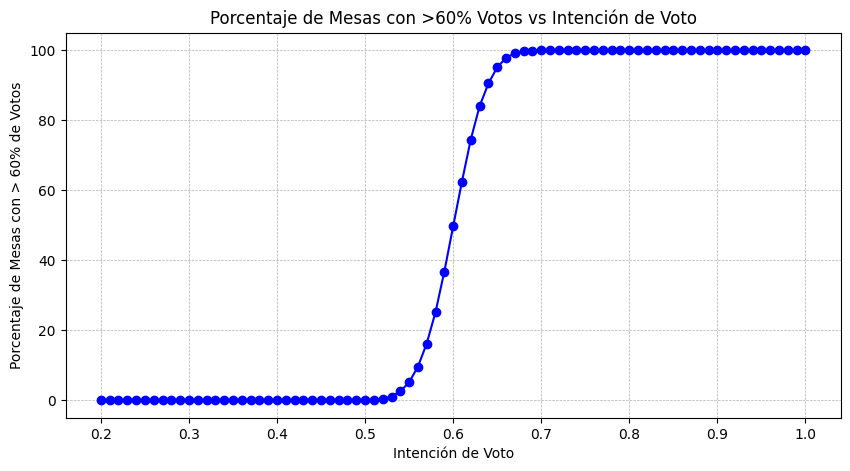

In [58]:
results_df_adjusted

# Creating the line chart
plt.figure(figsize=(10, 5))
plt.plot(results_df_adjusted['Preference'], results_df_adjusted['Percentage of Stations Over 60%'], marker='o', linestyle='-', color='b')
plt.title('Porcentaje de Mesas con >60% Votos vs Intención de Voto')
plt.xlabel('Intención de Voto')
plt.ylabel('Porcentaje de Mesas con > 60% de Votos')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

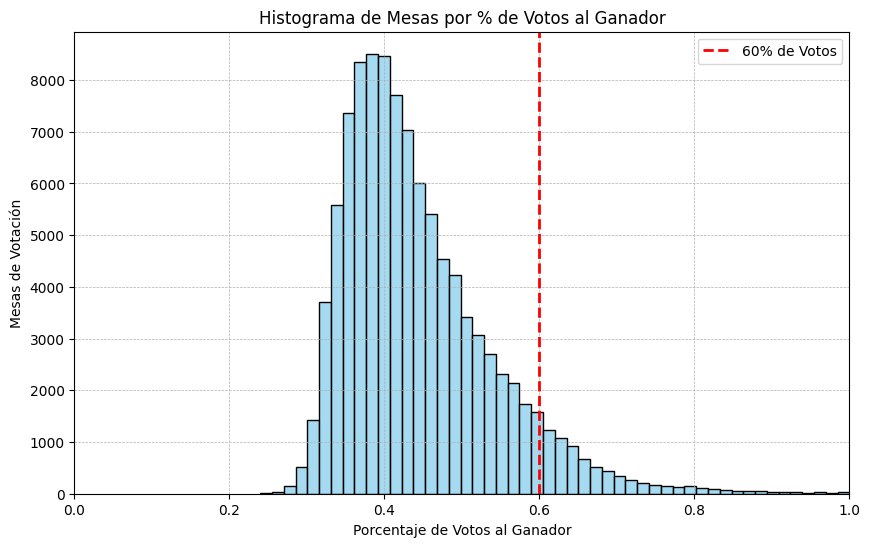

In [4]:

# Selecting only the vote count columns for each party
parties_votes = data[['UNION POR LA PATRIA - %', 'LA LIBERTAD AVANZA - %', 'JUNTOS POR EL CAMBIO - %', 
                      'HACEMOS POR NUESTRO PAIS - %', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %']]

# Calculating the winning party's vote percentage in each polling station
winning_party_percentage = parties_votes.max(axis=1).replace(0, np.nan)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(winning_party_percentage, bins=50, kde=False, color='skyblue')
plt.title('Histograma de Mesas por % de Votos al Ganador')
plt.xlabel('Porcentaje de Votos al Ganador')
plt.ylabel('Mesas de Votación')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.axvline(.6, color='red', linestyle='--', linewidth=2, label='60% de Votos')
plt.xlim(0, 1)  # Setting x-axis limit to [0, 100] for clarity
plt.legend()
plt.show()

In [5]:
high_preference_tables = data.loc[winning_party_percentage > 0.6]
high_preference_tables.index.size

7293

En total hay 7293 mesas que tuvieron un resultado anómalo

UNION POR LA PATRIA - %         6466
JUNTOS POR EL CAMBIO - %         665
LA LIBERTAD AVANZA - %           139
HACEMOS POR NUESTRO PAIS - %      23
dtype: int64


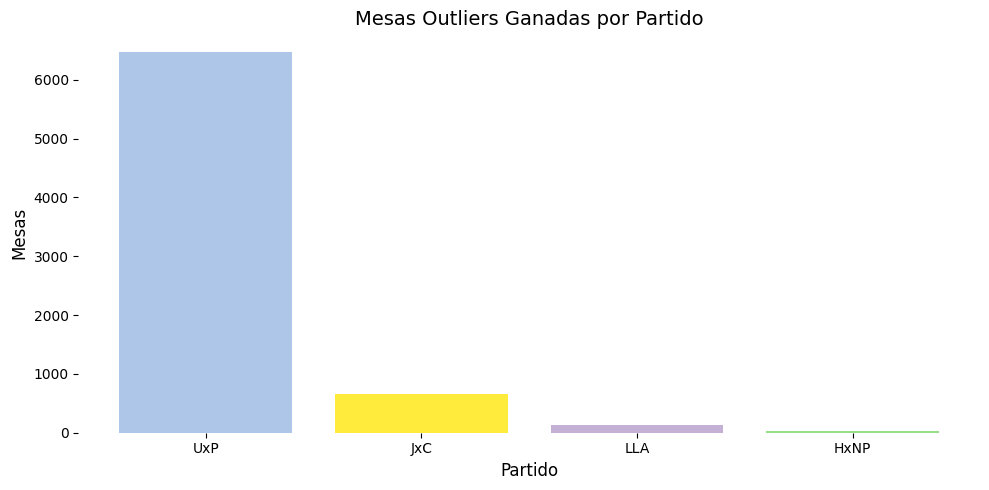

In [59]:
# Step 1: Identify high preference tables
high_preference_tables = data.loc[winning_party_percentage > 0.6]
high_preference_tables.describe()

# Step 2: Determine the winning party in each high preference table
winning_parties_high_preference = high_preference_tables[['UNION POR LA PATRIA - %', 'LA LIBERTAD AVANZA - %', 
                                                          'JUNTOS POR EL CAMBIO - %', 'HACEMOS POR NUESTRO PAIS - %', 
                                                          'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %']].idxmax(axis=1)

# Step 3: Count the number of tables won by each party
winning_parties_count = winning_parties_high_preference.value_counts()
print(winning_parties_count)

# Mapping full party names to abbreviations
party_name_mapping = {'UNION POR LA PATRIA - %': 'UxP', 'LA LIBERTAD AVANZA - %': 'LLA', 
                      'JUNTOS POR EL CAMBIO - %': 'JxC', 'HACEMOS POR NUESTRO PAIS - %': 'HxNP', 
                      'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %': 'FIT-U'}

# Renaming the index using abbreviations
winning_parties_count = winning_parties_count.rename(index=party_name_mapping)
# Specifying pastel colors for each party
colors_pastel = ['#aec7e8', '#ffeb3b',  '#c5b0d5', '#98df8a', '#ff9896']

# Step 4: Create a bar plot using matplotlib's bar function with pastel colors
plt.figure(figsize=(10, 5))
for i, party in enumerate(winning_parties_count.index):
    plt.bar(party, winning_parties_count[party], color=colors_pastel[i])
plt.title('Mesas Outliers Ganadas por Partido', fontsize=14)
plt.xlabel('Partido', fontsize=12)
plt.ylabel('Mesas', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

UNION POR LA PATRIA - %         88.660359
JUNTOS POR EL CAMBIO - %         9.118333
LA LIBERTAD AVANZA - %           1.905937
HACEMOS POR NUESTRO PAIS - %     0.315371
dtype: float64


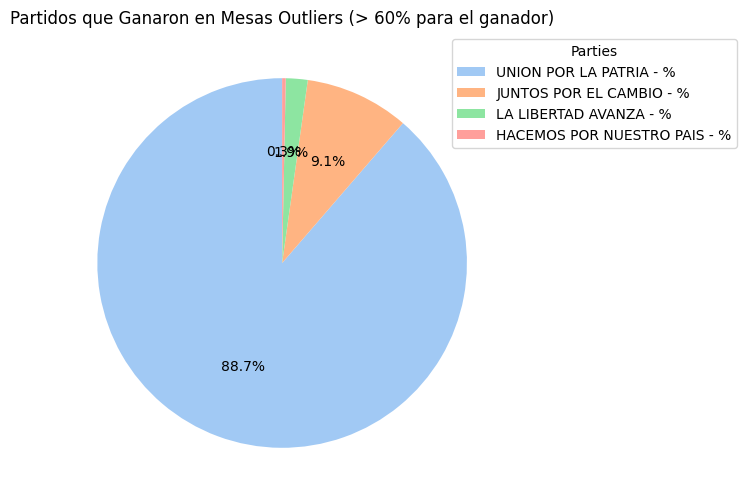

In [60]:

# Distribution of Anomalous Tables
# Step 1: Identify the polling stations with > 60% votes for the winning party
high_preference_tables = data.loc[winning_party_percentage > 0.6]

# Step 2: Find the winning party in each of these polling stations
# This can be done by identifying the party with the maximum percentage of votes in each row
winning_parties = high_preference_tables[['UNION POR LA PATRIA - %', 'LA LIBERTAD AVANZA - %', 
                                          'JUNTOS POR EL CAMBIO - %', 'HACEMOS POR NUESTRO PAIS - %', 
                                          'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %']].idxmax(axis=1)

# Step 3: Analyze the distribution of winners
winning_parties_distribution = winning_parties.value_counts(normalize=True) * 100
print(winning_parties_distribution)

# Pastel color palette
colors = sns.color_palette('pastel')

# Plotting the pie chart of high preference tables
plt.figure(figsize=(10, 6))
ax = winning_parties_distribution.plot.pie(autopct='%1.1f%%', startangle=90, colors=colors, labels=None)
plt.ylabel('')  # Hide y-axis label
plt.title('Partidos que Ganaron en Mesas Outliers (> 60% para el ganador)')
plt.legend(labels=winning_parties_distribution.index, title='Parties', bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

   Party  Total Votes
0    UxP    1103510.0
1    LLA     353569.0
2    JxC     242528.0
3   HxNP      41789.0
4  FIT-U      35806.0


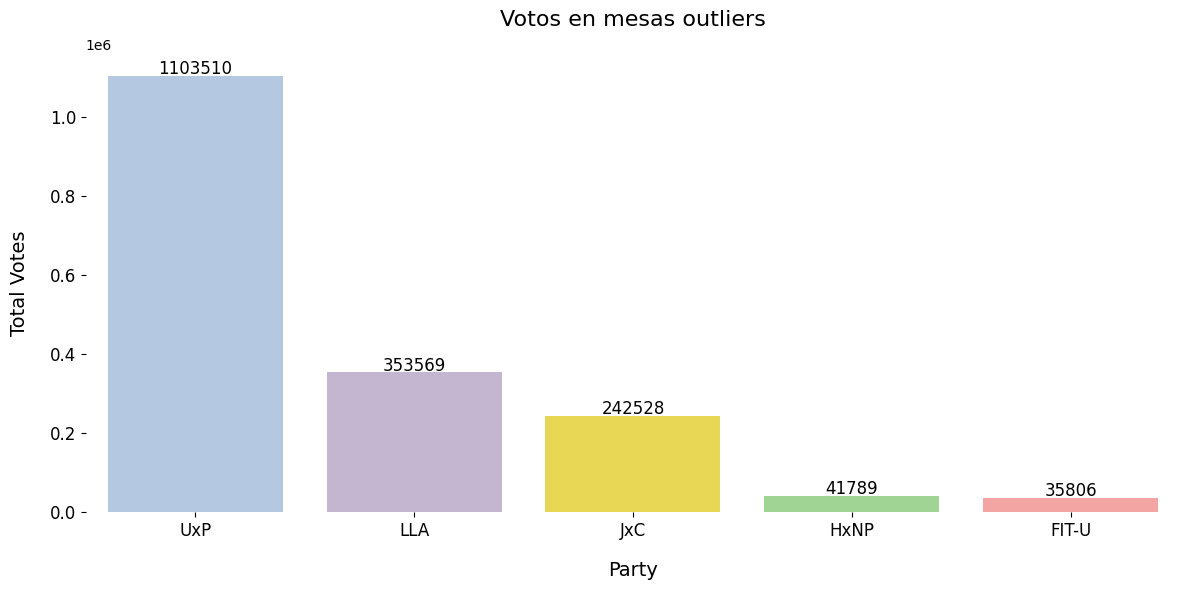

In [61]:

party_votes_high_preference = high_preference_tables[['UNION POR LA PATRIA', 'LA LIBERTAD AVANZA', 
                                                      'JUNTOS POR EL CAMBIO', 'HACEMOS POR NUESTRO PAIS', 
                                                      'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD']]

# Step 2: Sum the votes received by each party
total_votes_per_party = party_votes_high_preference.sum()

# Creating a DataFrame for seaborn
df = total_votes_per_party.reset_index()
df.columns = ['Party', 'Total Votes']
df['Party'] = df['Party'].replace({
    'UNION POR LA PATRIA': 'UxP', 'LA LIBERTAD AVANZA': 'LLA',
    'JUNTOS POR EL CAMBIO': 'JxC', 'HACEMOS POR NUESTRO PAIS': 'HxNP',
    'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD': 'FIT-U'
})

# Specifying pastel colors for each party
colors_pastel = ['#aec7e8', '#c5b0d5', '#ffeb3b', '#98df8a', '#ff9896']

print(df)
# Step 2: Create the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Party', y='Total Votes', hue='Party', data=df, dodge=False, palette=colors_pastel)
ax.set_title('Votos en mesas outliers', fontsize=16, pad=20)
ax.set_xlabel('Party', fontsize=14, labelpad=15)
ax.set_ylabel('Total Votes', fontsize=14, labelpad=15)
ax.tick_params(axis='both', labelsize=12)


# Adding the total votes on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

sns.despine(left=True, bottom=True)  # Remove borders
plt.tight_layout()
plt.show()

UNION POR LA PATRIA - %


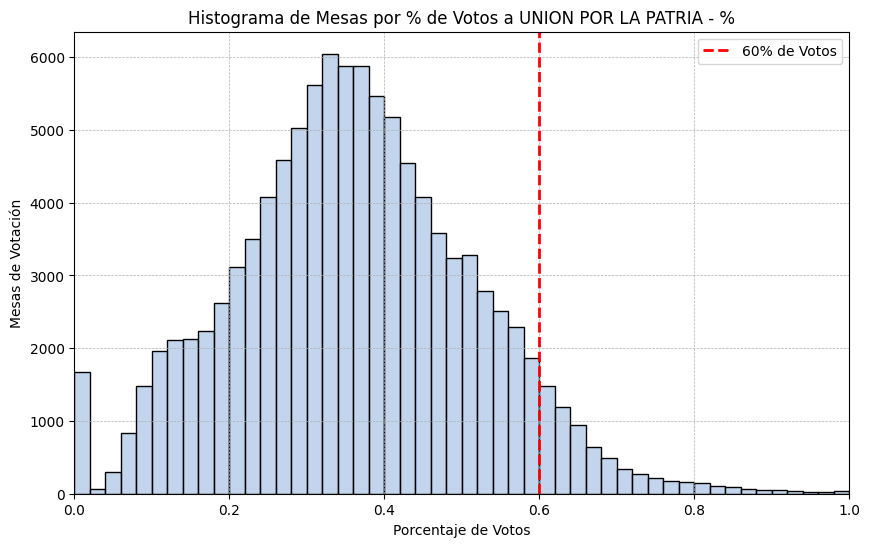

LA LIBERTAD AVANZA - %


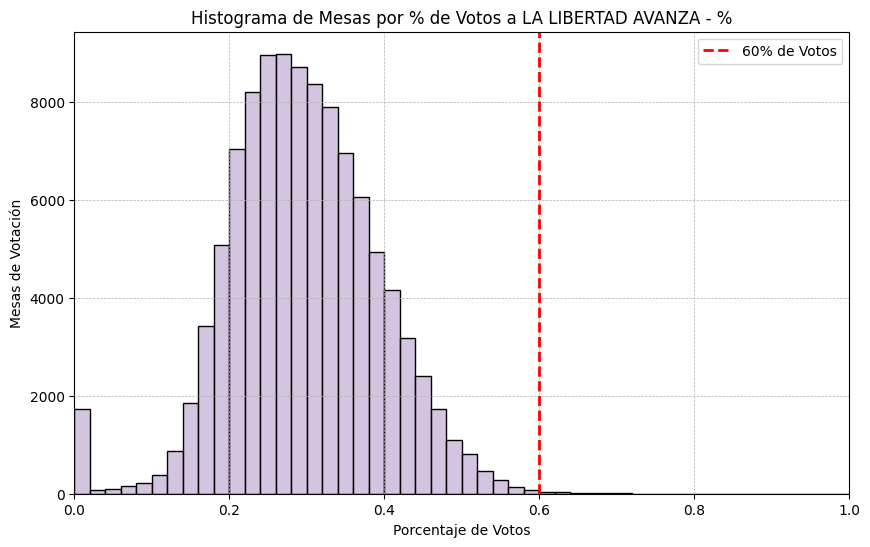

JUNTOS POR EL CAMBIO - %


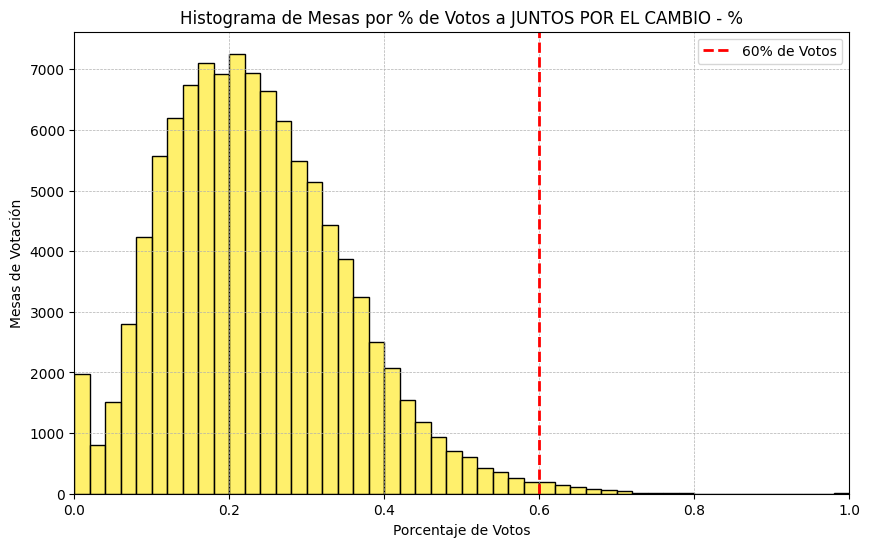

HACEMOS POR NUESTRO PAIS - %


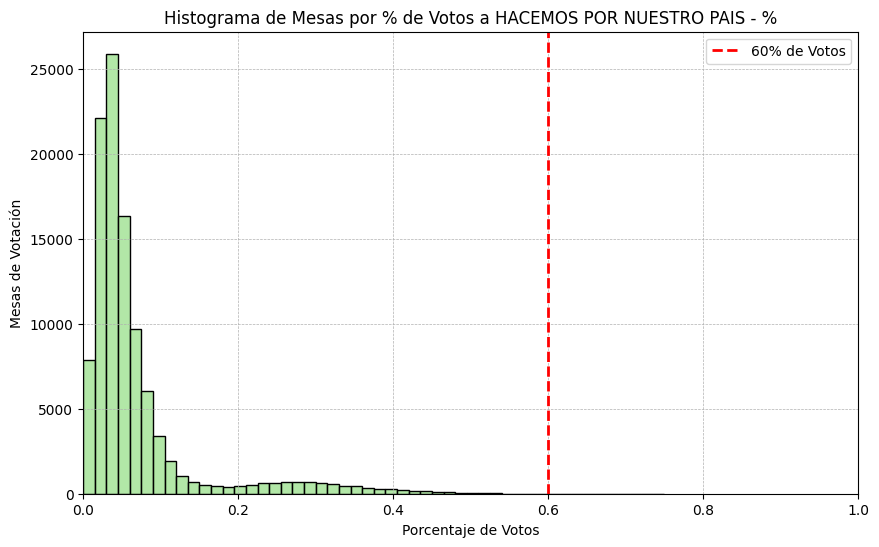

FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %


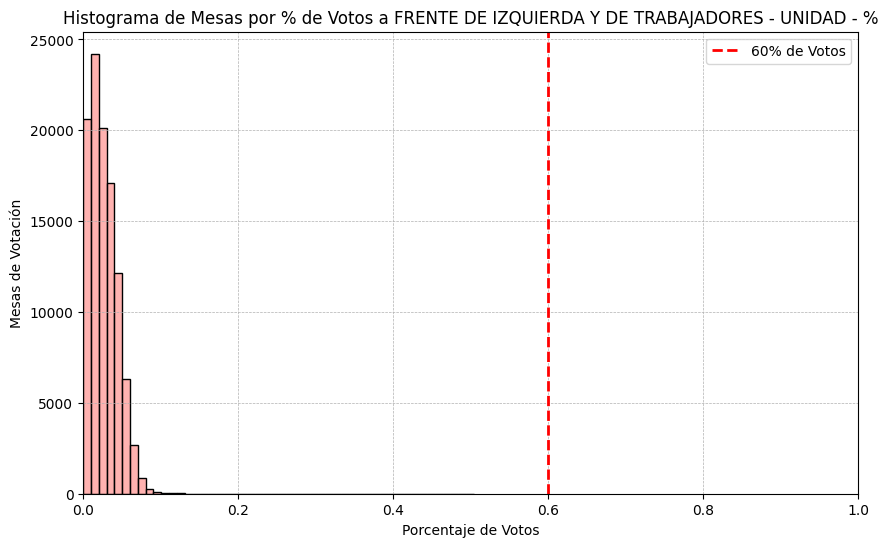

In [9]:


# Selecting only the vote percentage columns for each party
parties_votes_percent = data[['UNION POR LA PATRIA - %', 'LA LIBERTAD AVANZA - %', 'JUNTOS POR EL CAMBIO - %', 
                              'HACEMOS POR NUESTRO PAIS - %', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %']]

# Define party names and colors
party_names = parties_votes_percent.columns
colors = ['#aec7e8', '#c5b0d5', '#ffeb3b', '#98df8a', '#ff9896']  # Pastel colors

# Generate a histogram for each party
for party, color in zip(party_names, colors):
    print(party)
    plt.figure(figsize=(10, 6))
    sns.histplot(parties_votes_percent[party], bins=50, kde=False, color=color)
    plt.title(f'Histograma de Mesas por % de Votos a {party}')
    plt.xlabel('Porcentaje de Votos')
    plt.ylabel('Mesas de Votación')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.axvline(.6, color='red', linestyle='--', linewidth=2, label='60% de Votos')
    plt.xlim(0, 1)  # Setting x-axis limit to [0, 1] for clarity
    plt.legend()
    plt.show()

In [10]:
# Calculating the percentage of tables with more than 60% votes for each party
percentage_tables_above_60 = {}
for party in party_names:
    percentage_tables_above_60[party] = (parties_votes_percent[party] > 0.6).mean() * 100

percentage_tables_above_60

{'UNION POR LA PATRIA - %': 6.186375813241485,
 'LA LIBERTAD AVANZA - %': 0.13298890164561808,
 'JUNTOS POR EL CAMBIO - %': 0.6362418675851512,
 'HACEMOS POR NUESTRO PAIS - %': 0.022005357826253347,
 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD - %': 0.0}

# DISTRIBUCIÓN GEOGRÁFICA

In [11]:
# Grouping the high-preference tables by district and counting the number of tables in each district
district_distribution = high_preference_tables.groupby('Distrito').size()

# Sorting the districts by the number of high-preference tables in descending order
district_distribution_sorted = district_distribution.sort_values(ascending=False)

district_distribution_sorted

Distrito
Buenos Aires                                             2697
Santiago del Estero                                      1555
Tucumán                                                   591
Ciudad Autónoma de Buenos Aires                           545
Formosa                                                   434
Chaco                                                     311
Salta                                                     305
Corrientes                                                140
Catamarca                                                 116
La Rioja                                                   99
Misiones                                                   92
Santa Cruz                                                 61
Mendoza                                                    48
Santa Fe                                                   47
Río Negro                                                  44
Neuquén                                                    39

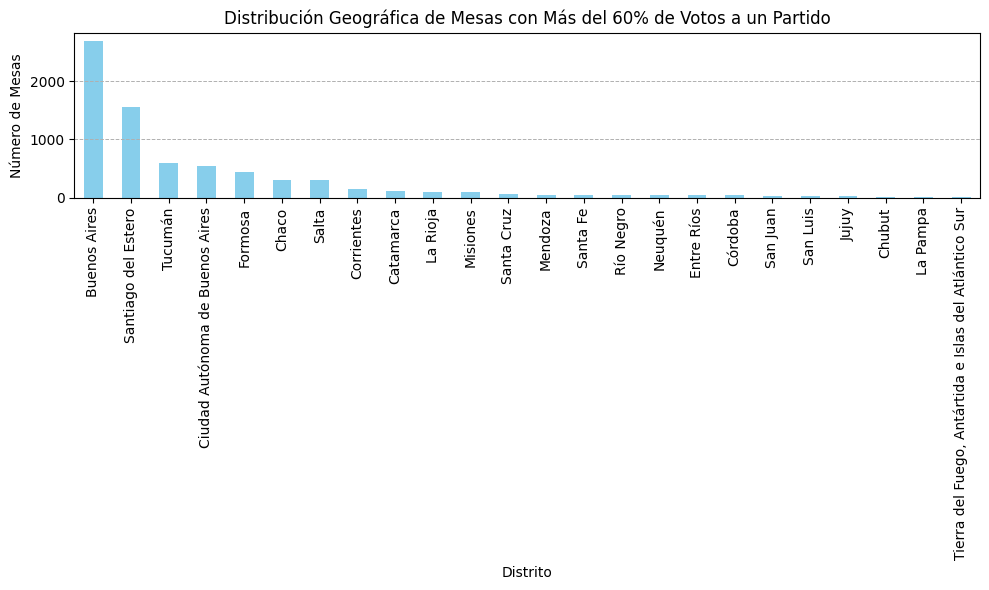

In [12]:
# Bar chart of the geographic distribution of high-preference tables
plt.figure(figsize=(10, 6))
district_distribution_sorted.plot(kind='bar', color='skyblue')
plt.title('Distribución Geográfica de Mesas con Más del 60% de Votos a un Partido')
plt.xlabel('Distrito')
plt.ylabel('Número de Mesas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

In [13]:
# Grouping the high-preference tables by district and counting the number of tables in each district
general_district_distribution = data.groupby('Distrito').size()

# Sorting the districts by the number of high-preference tables in descending order
general_district_distribution_sorted = general_district_distribution.sort_values(ascending=False)

general_district_distribution_sorted

Distrito
Buenos Aires                                             38074
Córdoba                                                   9097
Santa Fe                                                  8332
Ciudad Autónoma de Buenos Aires                           7326
Mendoza                                                   4357
Tucumán                                                   3919
Entre Ríos                                                3432
Salta                                                     3290
Chaco                                                     2947
Misiones                                                  2879
Corrientes                                                2760
Santiago del Estero                                       2464
Jujuy                                                     1825
San Juan                                                  1810
Río Negro                                                 1790
Neuquén                                       

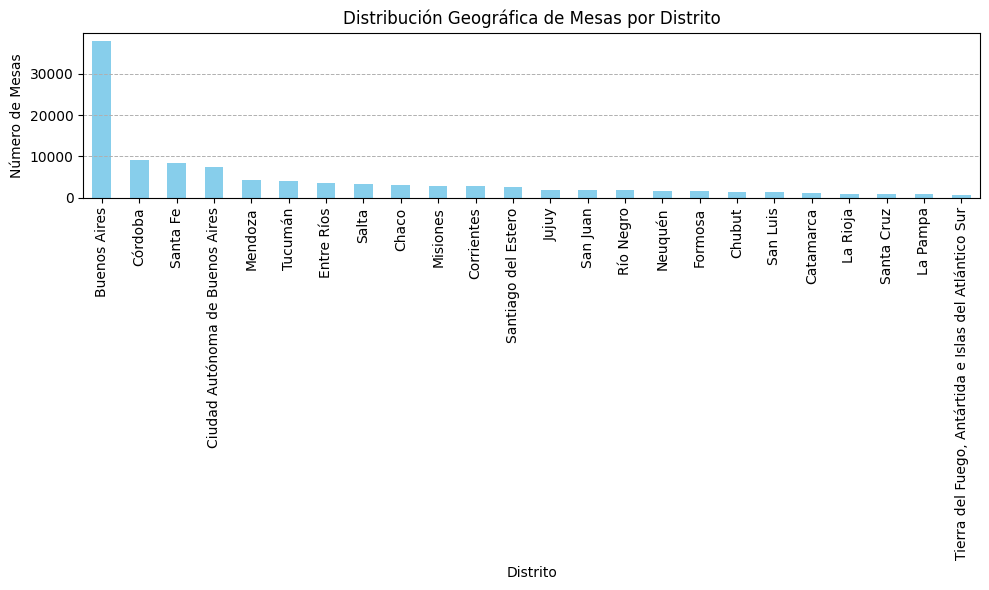

In [14]:
# Bar chart of the geographic distribution of high-preference tables
plt.figure(figsize=(10, 6))
general_district_distribution_sorted.plot(kind='bar', color='skyblue')
plt.title('Distribución Geográfica de Mesas por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Número de Mesas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

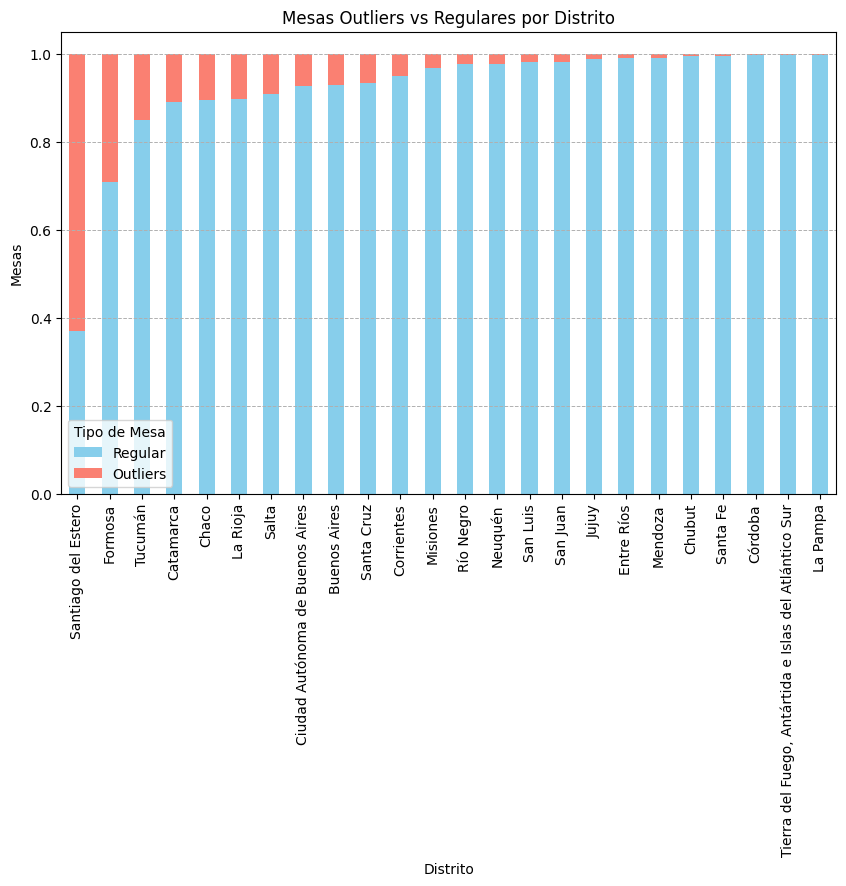

In [64]:
total_stations_per_district = data['Distrito'].value_counts()
high_pref_stations_per_district = high_preference_tables['Distrito'].value_counts()
districts_data = pd.DataFrame({
    'Total': total_stations_per_district,
    'Outliers': high_pref_stations_per_district
})
districts_data = districts_data.fillna(0)  # Fill NaN values with 0
districts_data['Regular'] = districts_data['Total'] - districts_data['Outliers']

districts_data_normalized = districts_data.div(districts_data['Total'], axis=0)
districts_data_normalized['Outliers']
ax = districts_data_normalized[['Regular', 'Outliers']].sort_values(by='Outliers', ascending=False).plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Mesas Outliers vs Regulares por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Mesas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Tipo de Mesa')

plt.show()


In [16]:
districts_data_normalized.sort_values(by='Anomalos', ascending=False)

,Total,Anomalos,Regular
Santiago del Estero,1.0,0.631088,0.368912
Formosa,1.0,0.292453,0.707547
Tucumán,1.0,0.150804,0.849196
Catamarca,1.0,0.109641,0.890359
Chaco,1.0,0.105531,0.894469
La Rioja,1.0,0.103665,0.896335
Salta,1.0,0.092705,0.907295
Ciudad Autónoma de Buenos Aires,1.0,0.074393,0.925607
Buenos Aires,1.0,0.070836,0.929164
Santa Cruz,1.0,0.066959,0.933041


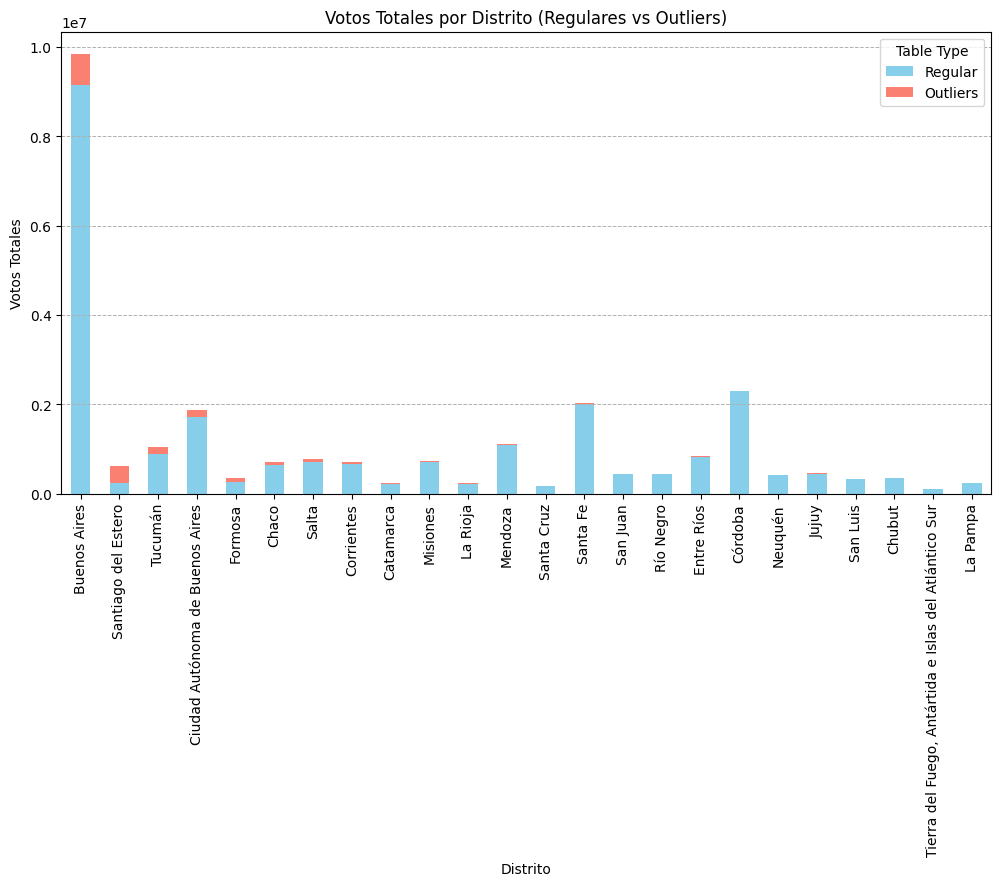

In [66]:
 parties = ['UNION POR LA PATRIA', 'LA LIBERTAD AVANZA', 'JUNTOS POR EL CAMBIO', 'HACEMOS POR NUESTRO PAIS', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD']

# Summing the votes for each party per Distrito for high-preference tables
high_pref_votes_per_distrito = high_preference_tables.groupby('Distrito')[parties].sum().sum(axis=1)

# Summing the votes for each party per Distrito for regular tables
regular_tables_distrito = data[~data.index.isin(high_preference_tables.index)]
regular_votes_per_distrito = regular_tables_distrito.groupby('Distrito')[parties].sum().sum(axis=1)
votes_distrito_data = pd.DataFrame({
    'Regular': regular_votes_per_distrito,
    'Outliers': high_pref_votes_per_distrito
})
votes_distrito_data = votes_distrito_data.fillna(0)  # Fill NaN values with 0
votes_distrito_data_sorted = votes_distrito_data.sort_values(by='Outliers', ascending=False)
ax = votes_distrito_data_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Votos Totales por Distrito (Regulares vs Outliers)')
plt.xlabel('Distrito')
plt.ylabel('Votos Totales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Table Type')

plt.show()


In [20]:
votes_distrito_data_sorted[['Anomalos']].sort_values(by='Anomalos', ascending=False)

,Anomalos
Distrito,
Buenos Aires,711988.0
Santiago del Estero,387480.0
Tucumán,152715.0
Ciudad Autónoma de Buenos Aires,136705.0
Formosa,97052.0
Chaco,66308.0
Salta,62771.0
Corrientes,30597.0
Catamarca,22568.0


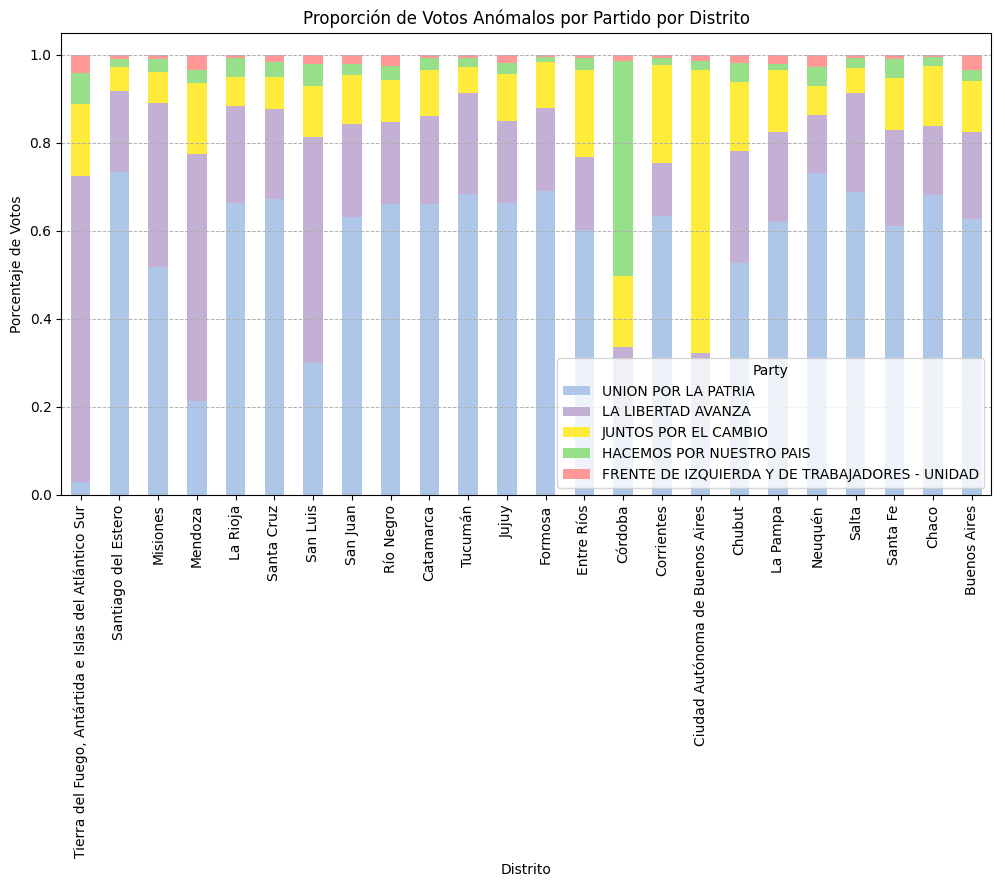

In [21]:
high_pref_votes_by_party_per_distrito = high_preference_tables.groupby('Distrito')[parties].sum()

high_pref_votes_normalized = high_pref_votes_by_party_per_distrito.divide(high_pref_votes_by_party_per_distrito.sum(axis=1), axis=0)
high_pref_votes_sorted = high_pref_votes_normalized.sum(axis=1).sort_values(ascending=False)
high_pref_votes_sorted = high_pref_votes_normalized.loc[high_pref_votes_sorted.index]
ax = high_pref_votes_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors_pastel)
plt.title('Proporción de Votos Anómalos por Partido por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Porcentaje de Votos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Party')

plt.show()


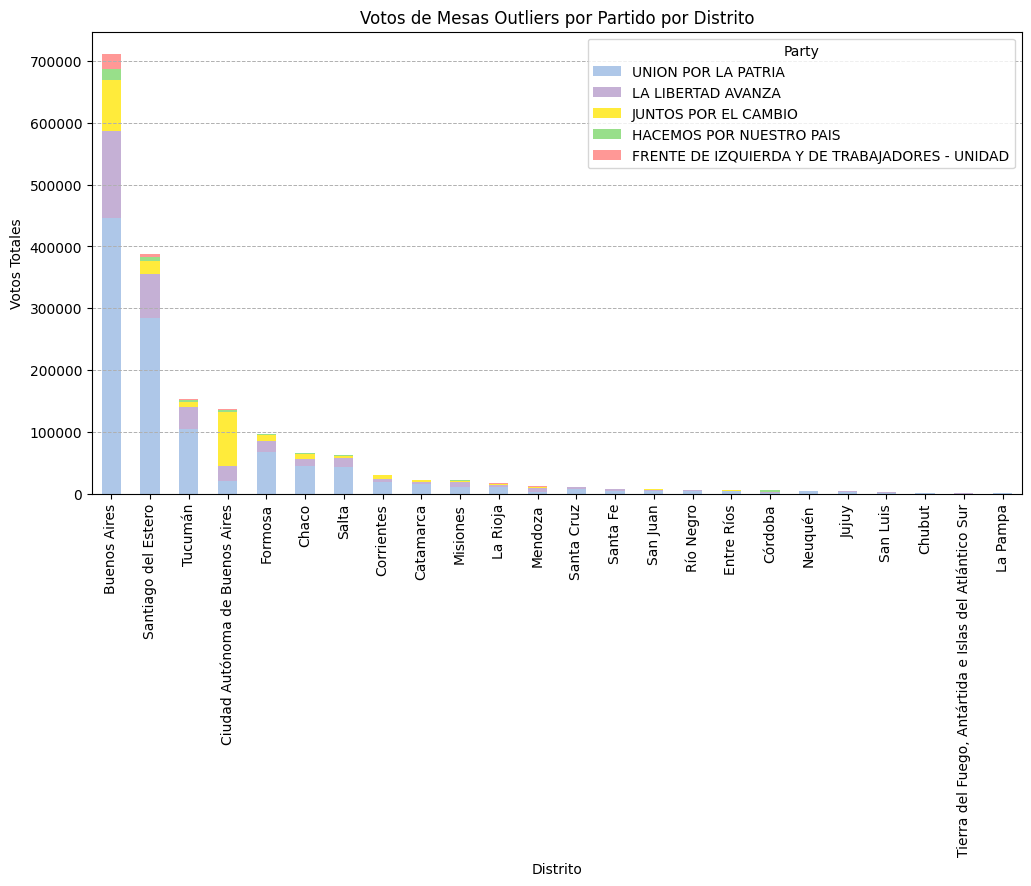

In [67]:
high_pref_votes_by_party_per_distrito = high_preference_tables.groupby('Distrito')[parties].sum()
high_pref_votes_sorted = high_pref_votes_by_party_per_distrito.sum(axis=1).sort_values(ascending=False)
high_pref_votes_sorted = high_pref_votes_by_party_per_distrito.loc[high_pref_votes_sorted.index]
ax = high_pref_votes_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors_pastel)
plt.title('Votos de Mesas Outliers por Partido por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Votos Totales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Party')
# plt.tight_layout()
plt.show()


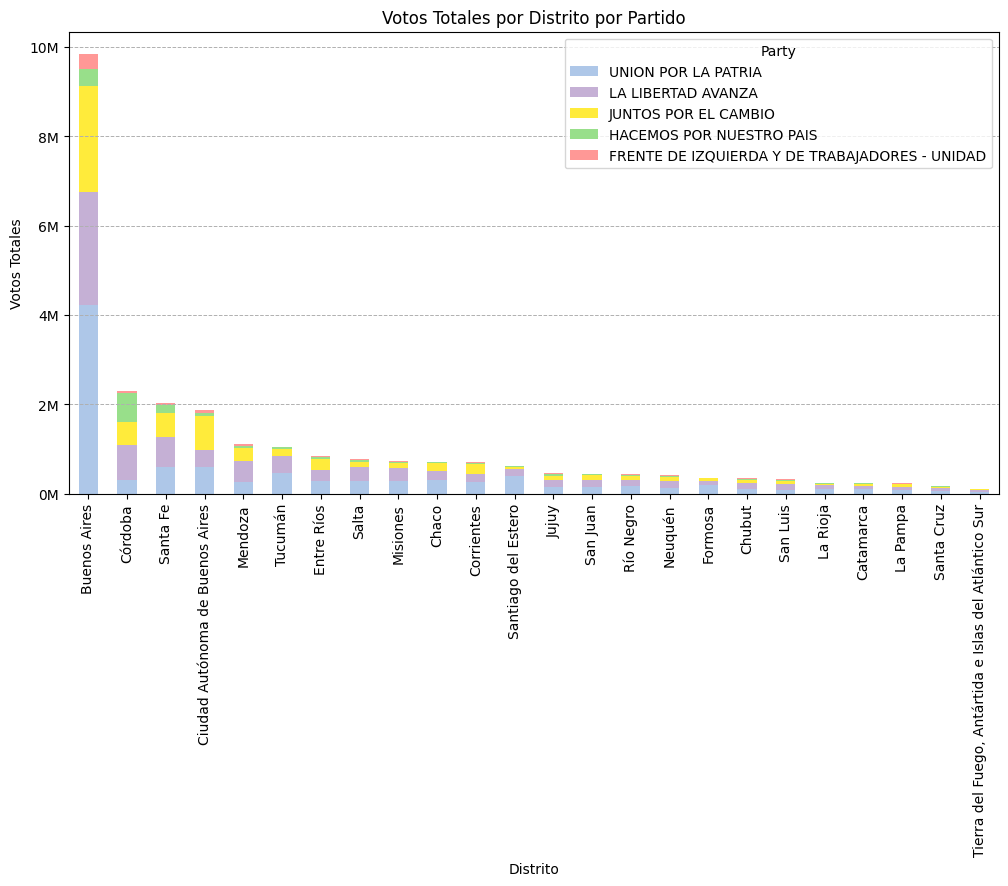

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Function to format y-axis ticks
def millions(x, pos):
    return f'{int(x / 1_000_000)}M'

# Creating a formatter using the function above
formatter = FuncFormatter(millions)

# Grouping the entire dataset by District and summing the votes for each party
total_votes_by_party_per_distrito = data.groupby('Distrito')[parties].sum()

# Sorting the DataFrame based on the total votes each district received
total_votes_sorted = total_votes_by_party_per_distrito.sum(axis=1).sort_values(ascending=False)
total_votes_sorted = total_votes_by_party_per_distrito.loc[total_votes_sorted.index]

# Creating the stacked bar chart
ax = total_votes_sorted.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors_pastel)
plt.title('Votos Totales por Distrito por Partido')
plt.xlabel('Distrito')
plt.ylabel('Votos Totales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Party')

# Applying the formatter to the y-axis
ax.yaxis.set_major_formatter(formatter)

plt.show()


In [129]:
total_votes_sorted

,UNION POR LA PATRIA,LA LIBERTAD AVANZA,JUNTOS POR EL CAMBIO,HACEMOS POR NUESTRO PAIS,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
Distrito,,,,,
Buenos Aires,4224688.0,2533633.0,2374023.0,367457.0,352790.0
Córdoba,308016.0,769847.0,519252.0,665717.0,31895.0
Santa Fe,601241.0,657813.0,544677.0,183205.0,38553.0
Ciudad Autónoma de Buenos Aires,600937.0,369470.0,767432.0,57614.0,66158.0
Mendoza,265740.0,469367.0,286475.0,47958.0,38572.0
Tucumán,471145.0,365992.0,153130.0,42086.0,15152.0
Entre Ríos,276850.0,247640.0,250512.0,44720.0,12760.0
Salta,287756.0,309115.0,106684.0,47990.0,13533.0
Misiones,275062.0,305629.0,104787.0,29966.0,10036.0


In [119]:
high_pref_votes_sorted

,UNION POR LA PATRIA,LA LIBERTAD AVANZA,JUNTOS POR EL CAMBIO,HACEMOS POR NUESTRO PAIS,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
Distrito,,,,,
Buenos Aires,446390.0,141024.0,81382.0,17861.0,25331.0
Santiago del Estero,283787.0,71953.0,21006.0,6851.0,3883.0
Tucumán,104163.0,35350.0,8871.0,3122.0,1209.0
Ciudad Autónoma de Buenos Aires,20480.0,23600.0,87971.0,2744.0,1910.0
Formosa,67012.0,18207.0,10219.0,1181.0,433.0
Chaco,45113.0,10495.0,9029.0,1312.0,359.0
Salta,43239.0,14047.0,3563.0,1457.0,465.0
Corrientes,19355.0,3704.0,6826.0,503.0,209.0
Catamarca,14907.0,4500.0,2348.0,620.0,193.0


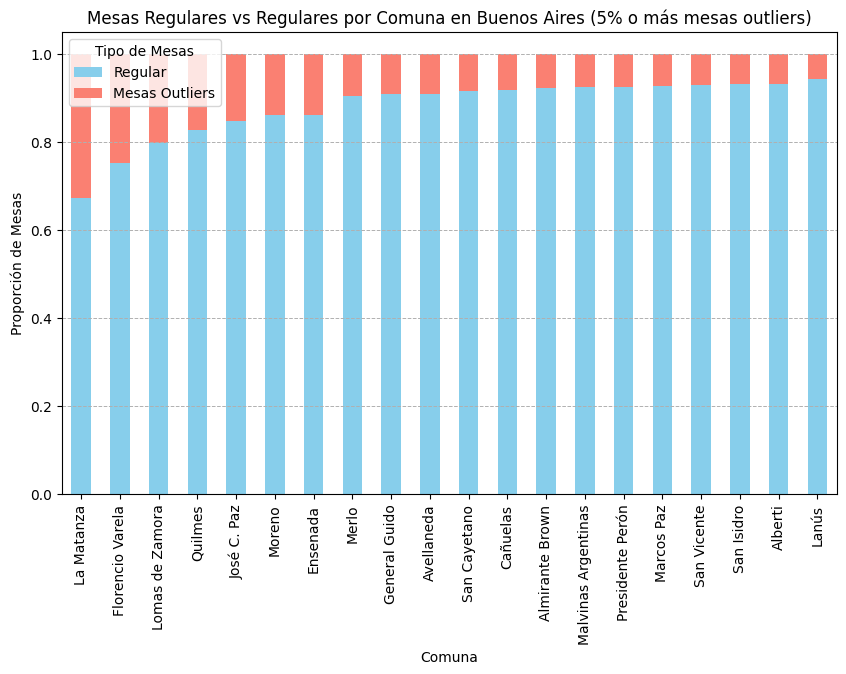

In [72]:
ba_data = data[data['Distrito'] == 'Buenos Aires']
ba_high_pref_data = high_preference_tables[high_preference_tables['Distrito'] == 'Buenos Aires']
total_tables_per_comuna = ba_data['Comuna_Municipio'].value_counts()
high_pref_tables_per_comuna = ba_high_pref_data['Comuna_Municipio'].value_counts()
comuna_data = pd.DataFrame({
    'Total': total_tables_per_comuna,
    'Mesas Outliers': high_pref_tables_per_comuna
})
comuna_data = comuna_data.fillna(0)  # Fill NaN values with 0
comuna_data['Regular'] = comuna_data['Total'] - comuna_data['Mesas Outliers']
comuna_data_normalized = comuna_data.div(comuna_data['Total'], axis=0)
comuna_data_filtered = comuna_data_normalized[comuna_data_normalized['Mesas Outliers'] >= 0.05]

ax = comuna_data_filtered[['Regular', 'Mesas Outliers']].sort_values(by='Mesas Outliers', ascending=False).plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Mesas Regulares vs Regulares por Comuna en Buenos Aires (5% o más mesas outliers)')
plt.xlabel('Comuna')
plt.ylabel('Proporción de Mesas')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Tipo de Mesas')

plt.show()


In [94]:
(comuna_data_filtered.sort_values(by="Mesas Anomalas", ascending=False))[['Mesas Anomalas']]

,Mesas Anomalas
La Matanza,0.327655
Florencio Varela,0.246362
Lomas de Zamora,0.200814
Quilmes,0.171784
José C. Paz,0.151976
Moreno,0.138728
Ensenada,0.137725
Merlo,0.095980
General Guido,0.090909
Avellaneda,0.089728


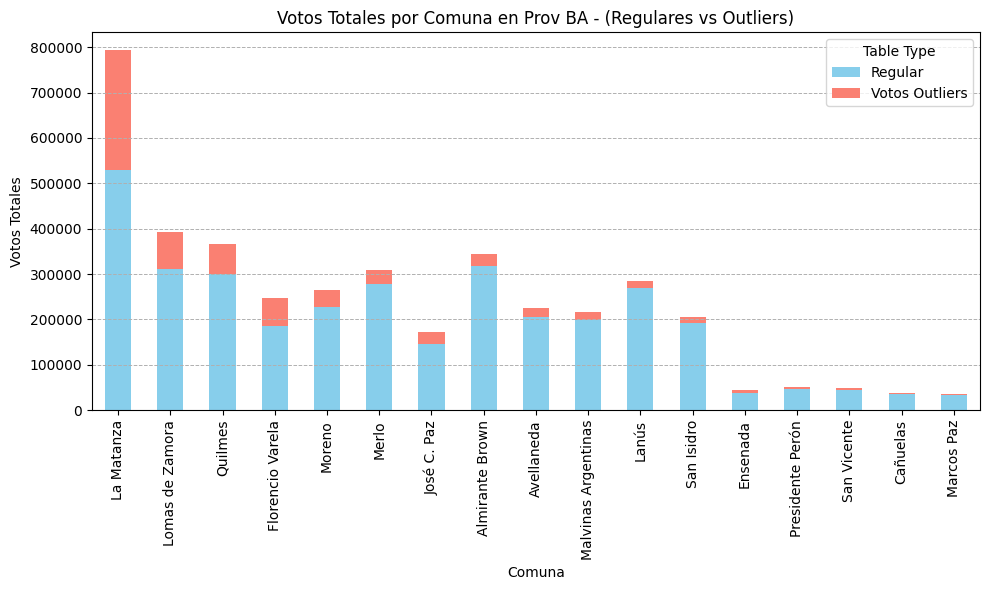

In [73]:
# List of parties
parties = ['UNION POR LA PATRIA', 'LA LIBERTAD AVANZA', 'JUNTOS POR EL CAMBIO', 'HACEMOS POR NUESTRO PAIS', 'FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD']

# Summing the votes for each party per Comuna for high-preference tables
high_pref_votes_per_comuna = ba_high_pref_data.groupby('Comuna_Municipio')[parties].sum().sum(axis=1)

# Summing the votes for each party per Comuna for regular tables
regular_tables = ba_data[~ba_data.index.isin(ba_high_pref_data.index)]
regular_votes_per_comuna = regular_tables.groupby('Comuna_Municipio')[parties].sum().sum(axis=1)
votes_comuna_data = pd.DataFrame({
    'Regular': regular_votes_per_comuna, 
        'Votos Outliers': high_pref_votes_per_comuna
})
votes_comuna_data = votes_comuna_data.fillna(0)  # Fill NaN values with 0
# Calculate the percentage of anomalous votes in each comuna
votes_comuna_data['Anomalous Percentage'] = votes_comuna_data['Votos Outliers'] / (votes_comuna_data['Regular'] + votes_comuna_data['Votos Outliers'])

# Filter out the comunas with less than 5% of anomalous votes
votes_comuna_data_filtered = votes_comuna_data[votes_comuna_data['Anomalous Percentage'] > 0.05]

# Sort the comunas based on the number of anomalous votes from highest to lowest
votes_comuna_data_sorted = votes_comuna_data_filtered.sort_values(by='Votos Outliers', ascending=False)

# Plotting the stacked bar chart
ax = votes_comuna_data_sorted[['Regular', 'Votos Outliers']].plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Votos Totales por Comuna en Prov BA - (Regulares vs Outliers)')
plt.xlabel('Comuna')
plt.ylabel('Votos Totales')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Table Type')
plt.tight_layout()
plt.show()


In [133]:
votes_comuna_data_sorted[['Votos Anomalos']]

,Votos Anomalos
Comuna_Municipio,
La Matanza,263713.0
Lomas de Zamora,81102.0
Quilmes,64139.0
Florencio Varela,61592.0
Moreno,37248.0
Merlo,30371.0
José C. Paz,26643.0
Almirante Brown,26194.0
Avellaneda,19799.0


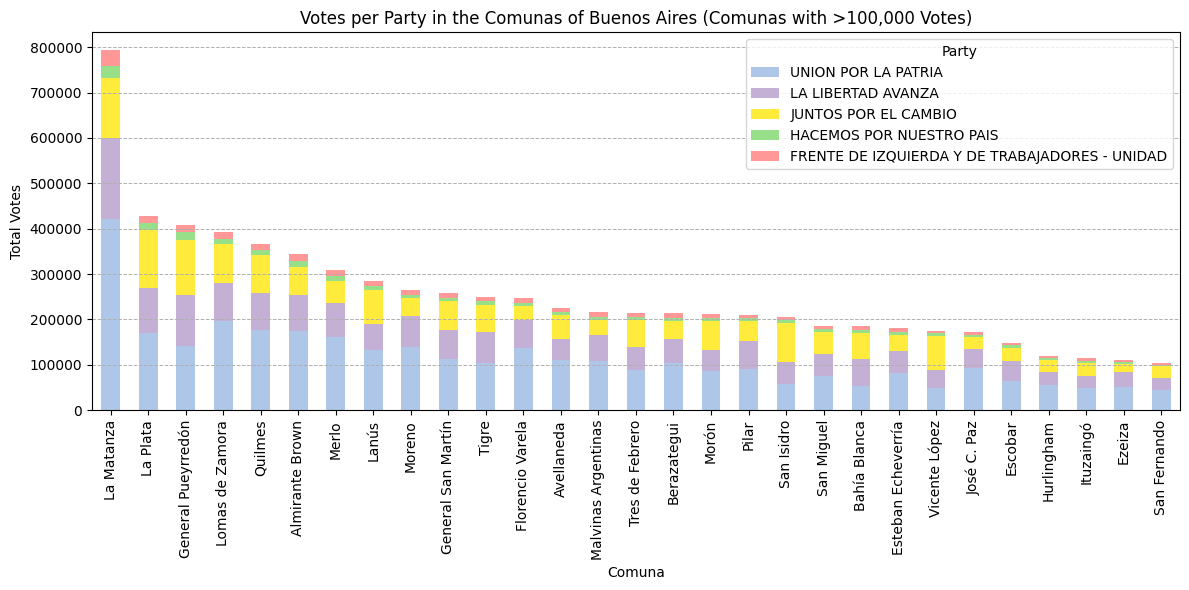

In [136]:
# Grouping the data by "Comuna_Municipio" and summing the votes for each party
votes_per_party_per_comuna = ba_data.groupby('Comuna_Municipio')[parties].sum()

# Sorting the comunas based on total votes
total_votes_per_comuna = votes_per_party_per_comuna.sum(axis=1).sort_values(ascending=False)
votes_per_party_per_comuna_sorted = votes_per_party_per_comuna.loc[total_votes_per_comuna.index]
# Grouping the data by "Comuna_Municipio" and summing the votes for each party
votes_per_party_per_comuna = ba_data.groupby('Comuna_Municipio')[parties].sum()

# Sorting the comunas based on total votes
total_votes_per_comuna = votes_per_party_per_comuna.sum(axis=1).sort_values(ascending=False)
votes_per_party_per_comuna_sorted = votes_per_party_per_comuna.loc[total_votes_per_comuna.index]

# Filtering comunas with less than 100,000 votes
votes_per_party_per_comuna_filtered = votes_per_party_per_comuna_sorted[total_votes_per_comuna >= 100000]

# Plotting the stacked bar chart
ax = votes_per_party_per_comuna_filtered.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors_pastel)
plt.title('Votes per Party in the Comunas of Buenos Aires (Comunas with >100,000 Votes)')
plt.xlabel('Comuna')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Party')
plt.tight_layout()
plt.show()



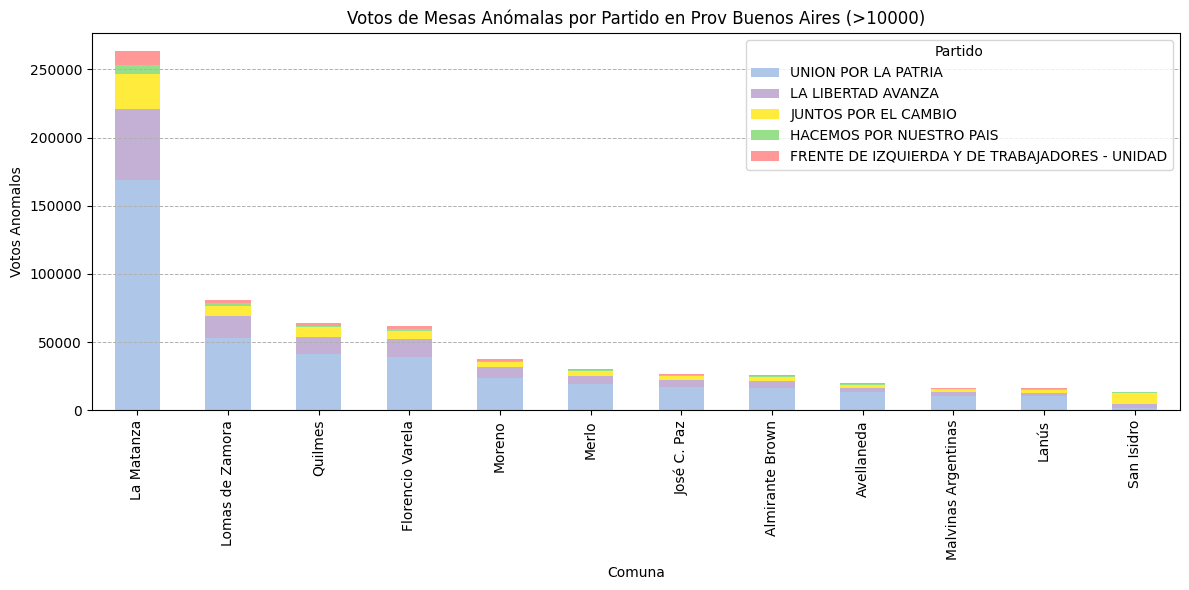

In [155]:
# Summing the high preference votes for each party per Comuna
high_pref_votes_per_party_per_comuna = ba_high_pref_data.groupby('Comuna_Municipio')[parties].sum()

# Calculating the total high preference votes per comuna
total_high_pref_votes_per_comuna = high_pref_votes_per_party_per_comuna.sum(axis=1)

# Filtering out comunas with less than 100,000 high preference votes
filtered_high_pref_votes = high_pref_votes_per_party_per_comuna[total_high_pref_votes_per_comuna >= 10000]

# Sorting the comunas based on total high preference votes within the filtered DataFrame
sorted_filtered_high_pref_votes = filtered_high_pref_votes.loc[total_high_pref_votes_per_comuna[filtered_high_pref_votes.index].sort_values(ascending=False).index]

# Plotting the stacked bar chart
ax = sorted_filtered_high_pref_votes.plot(kind='bar', stacked=True, figsize=(12, 6), color=colors_pastel)
plt.title('Votos de Mesas Anómalas por Partido en Prov Buenos Aires (>10000)')
plt.xlabel('Comuna')
plt.ylabel('Votos Anomalos')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.legend(title='Partido')
plt.tight_layout()
plt.show()


In [156]:
sorted_filtered_high_pref_votes

,UNION POR LA PATRIA,LA LIBERTAD AVANZA,JUNTOS POR EL CAMBIO,HACEMOS POR NUESTRO PAIS,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD
Comuna_Municipio,,,,,
La Matanza,168812.0,52265.0,25441.0,7025.0,10170.0
Lomas de Zamora,53001.0,15909.0,7632.0,1872.0,2688.0
Quilmes,41475.0,12229.0,7066.0,1287.0,2082.0
Florencio Varela,39326.0,12670.0,5770.0,1556.0,2270.0
Moreno,23493.0,7955.0,3587.0,938.0,1275.0
Merlo,18994.0,6249.0,3186.0,778.0,1164.0
José C. Paz,16745.0,5664.0,2583.0,705.0,946.0
Almirante Brown,16396.0,5052.0,2980.0,746.0,1020.0
Avellaneda,13234.0,3172.0,2387.0,409.0,597.0


In [ ]:
sorted_filtered_high_pref_votes
